In [1]:
import pandas as pd, numpy as np, seaborn as sns,matplotlib.pyplot as plt

In [2]:
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')
welfare = raw_welfare.copy()


In [3]:
color=['#ADA1F0','#A1F0CB','#F0ACA1','#F0E284','#9E7D78','#5980F0','#59F067','#EF598B','#F0BD3C','#9E7583']
sns.set_palette(sns.color_palette(color))

In [4]:
welfare.head()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN


In [5]:
welfare = welfare.rename(
    columns= {'h14_g3' :'sex',
              'h14_g4' :'birth',
              'h14_g10' :'marriage_type',
              'h14_g11' :'religion',
              'p1402_8aq1' :'income',
              'h14_eco9' :'code_job',
              'h14_reg7' :'code_region'}
)
welfare['marriage_type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14418 entries, 0 to 14417
Series name: marriage_type
Non-Null Count  Dtype  
--------------  -----  
14418 non-null  float64
dtypes: float64(1)
memory usage: 112.8 KB


In [6]:
welfare['sex']= np.where(welfare['sex']==1,'male','female')
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

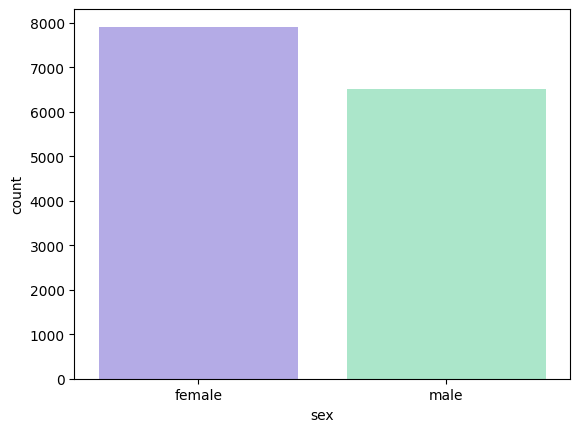

In [7]:
sns.countplot(data=welfare,x= 'sex', hue='sex');

In [8]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

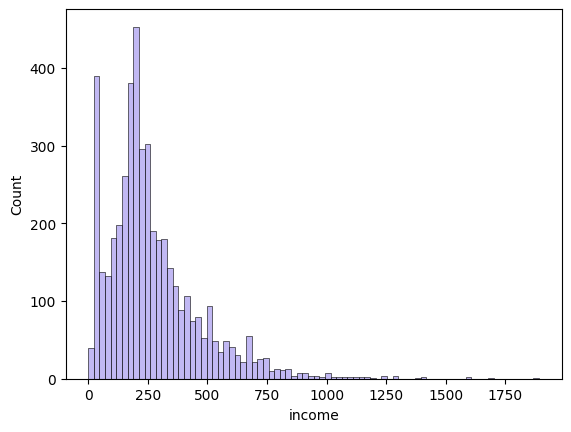

In [9]:
sns.histplot(data=welfare, x = 'income')

In [10]:
welfare['income'].dropna()
welfare['income'].isna().sum()

np.int64(9884)

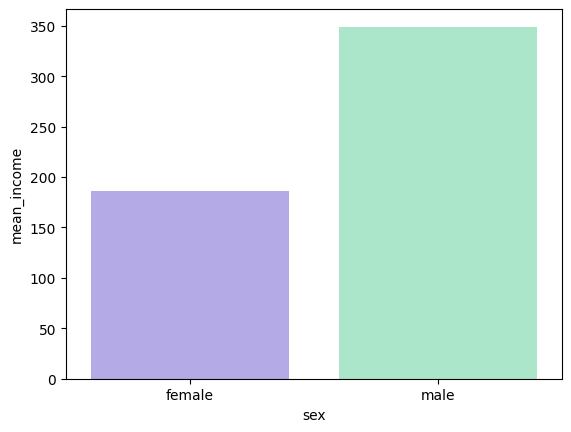

In [11]:
sex_income = welfare.groupby('sex')\
                    .agg(mean_income = ('income','mean'))
sns.barplot(data=sex_income,x='sex',y='mean_income',hue='sex');

In [12]:
welfare=welfare.assign(age = 2019-welfare['birth']+1)


In [13]:
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

In [14]:
age_income=welfare.dropna(subset='income')\
                  .groupby('age')\
                  .agg(income_mean=('income','mean'))
age_income.head()

,income_mean
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471


<Axes: xlabel='age', ylabel='income_mean'>

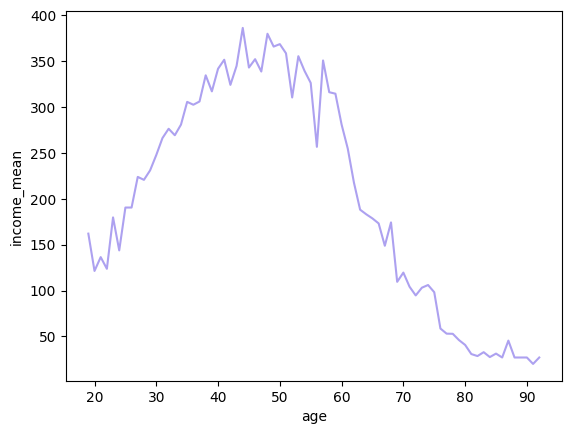

In [15]:
sns.lineplot(data=age_income,x='age',y='income_mean')

In [16]:
welfare = welfare.assign(ageg = np.where(welfare['age']<30,'young',
                                np.where(welfare['age']<=59,'middle','old')))

welfare['ageg'].value_counts()

ageg
old       5955
middle    4963
young     3500
Name: count, dtype: int64

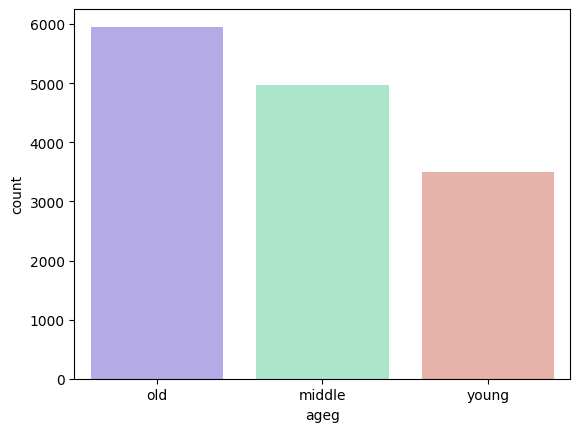

In [17]:
sns.countplot(data= welfare,x='ageg',hue='ageg');

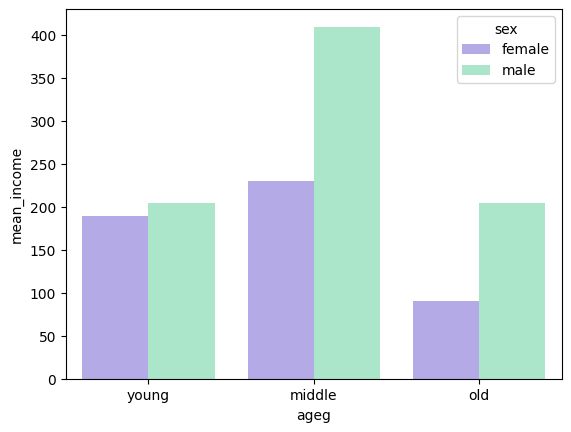

In [18]:
ageg_income = welfare.dropna(subset= 'income')\
                     .groupby(['ageg','sex'],as_index=False)\
                     .agg(mean_income = ('income','mean'))
sns.barplot(data=ageg_income,x='ageg',y='mean_income',hue='sex',order=['young','middle','old']);

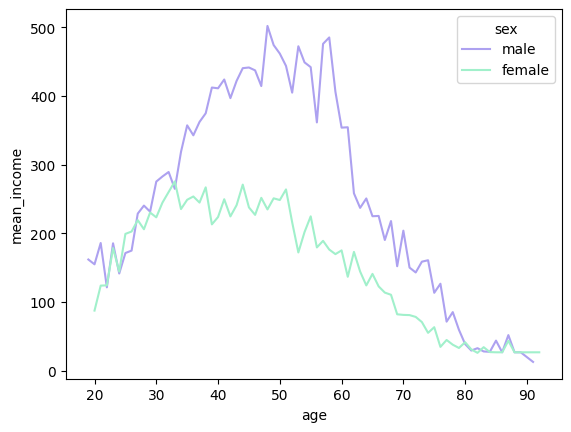

In [19]:
sex_income = welfare.dropna(subset= 'income')\
                     .groupby(['age','sex'],as_index=False)\
                     .agg(mean_income = ('income','mean'))
sns.lineplot(data=sex_income,x='age',y='mean_income',hue='sex');

In [20]:
list_job = pd.read_excel('Koweps_Codebook_2019.xlsx',sheet_name='직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [21]:
welfare = welfare.merge(list_job,how='left',on='code_job')
welfare[['code_job','job']].head()

,code_job,job
0,NaN,NaN
1,NaN,NaN
2,762.0,전기공
3,855.0,금속기계 부품 조립원
4,NaN,NaN


In [22]:
welfare.dropna(subset='code_job')[['code_job','job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [23]:
job_income = welfare.dropna(subset= ['job','income'])\
                    .groupby('job',as_index=False)\
                    .agg(mean_income = ('income','mean'))
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000


In [24]:
top10=job_income.sort_values('mean_income',ascending=False).head(10)
bottom10=job_income.sort_values('mean_income').head(10)

In [25]:
plt.rcParams.update({'font.family':'Malgun Gothic'})


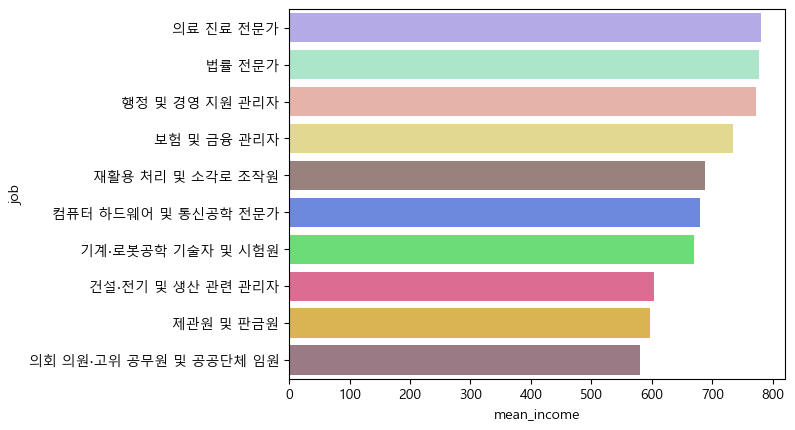

In [26]:
sns.barplot(data=top10, y='job',x='mean_income',hue='job');

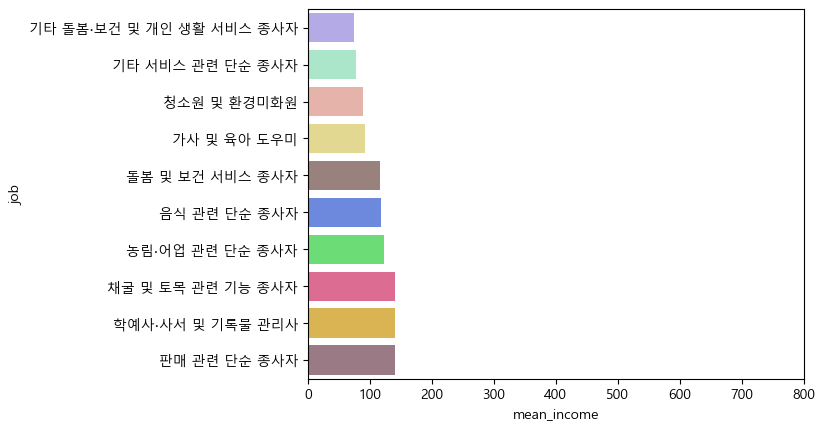

In [27]:
sns.barplot(data=bottom10,y='job',x='mean_income',hue='job').set(xlim=[0,800]);

In [28]:
job_male = welfare.dropna(subset='job')\
                  .query('sex=="male"')\
                  .groupby('job',as_index=False)\
                  .agg(n=('job','count'))\
                  .sort_values('n',ascending=False)\
                  .head(10)
job_male
                  

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [29]:
job_female = welfare.dropna(subset='job')\
                    .query('sex=="female"')\
                    .groupby('job',as_index=False)\
                    .agg(n=('job','count'))\
                    .sort_values('n',ascending=False)\
                    .head(10)
job_female
                  

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


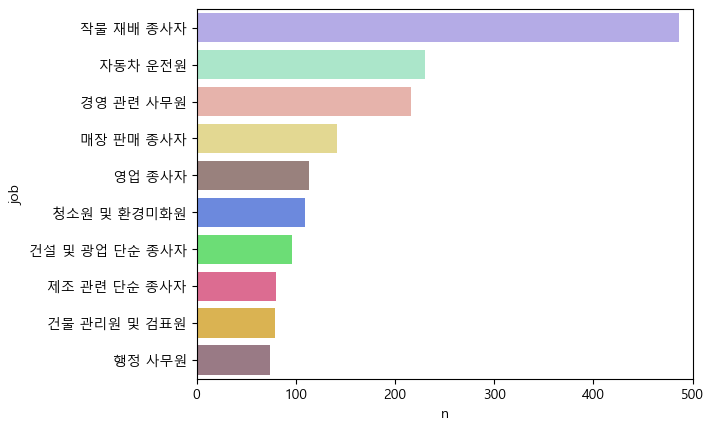

In [30]:
sns.barplot(data=job_male,x='n',y='job',hue='job').set(xlim=[0,500]);

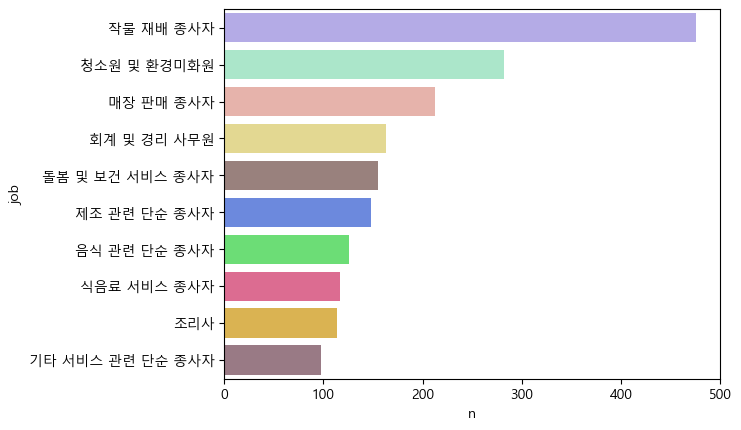

In [31]:
sns.barplot(data=job_female,x='n',y='job',hue='job').set(xlim=[0,500]);

In [32]:
welfare['religion'].value_counts()

religion
2.0    7815
1.0    6603
Name: count, dtype: int64

In [33]:
welfare['religion']=np.where(welfare['religion']==1,'yes','no')

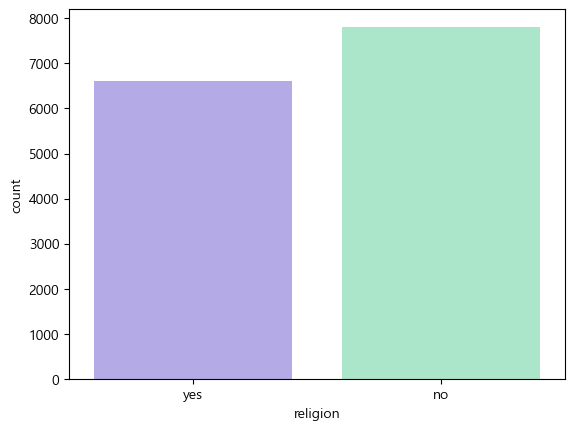

In [34]:
sns.countplot(data=welfare,x='religion',hue='religion');

In [35]:
welfare['marriage']= np.where(welfare['marriage_type']==1,'marriage',
                     np.where(welfare['marriage_type']==3,'divorce','etc'))

In [36]:
n_divorce = welfare.groupby('marriage',as_index=False)\
                   .agg(n=('marriage','count'))
n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


In [37]:
rel_div = welfare.query('marriage!="etc"')\
                 .groupby('religion',as_index=False)\
                 ['marriage']\
                 .value_counts(normalize=True)
rel_div= rel_div.query('marriage=="divorce"')\
                .assign(proportion = rel_div['proportion']*100)\
                .round(1)
rel_div

,religion,marriage,proportion
1,no,divorce,9.5
3,yes,divorce,8.0


In [38]:
age_div = welfare.query('marriage!="etc"')\
                 .groupby('ageg',as_index=False)\
                 ['marriage']\
                 .value_counts(normalize=True)
age_div

,ageg,marriage,proportion
0,middle,marriage,0.910302
1,middle,divorce,0.089698
2,old,marriage,0.914220
3,old,divorce,0.085780
4,young,marriage,0.950000
5,young,divorce,0.050000
